SEABORN

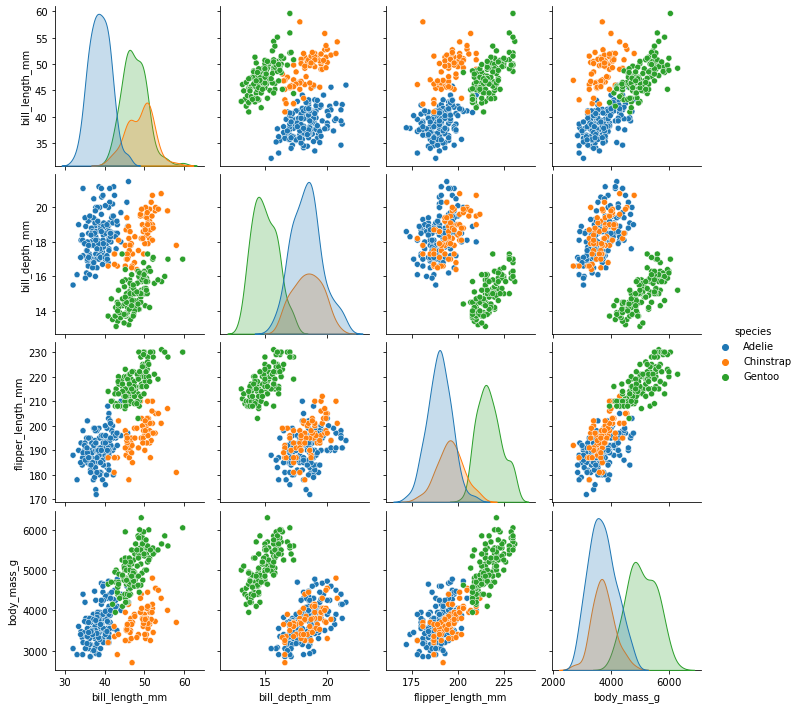

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("penguins")
sns.pairplot(df,hue="species")

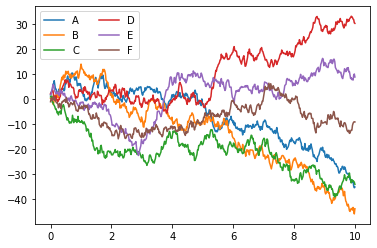

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)

plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

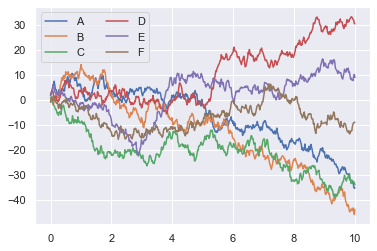

In [5]:
import seaborn as sns
sns.set()

plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

In [6]:
import seaborn as sns

tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Relational Plots

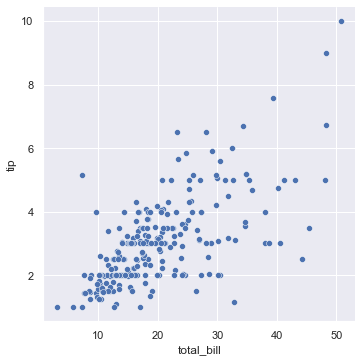

In [7]:
sns.relplot(data=tips,
           x="total_bill",
           y="tip")

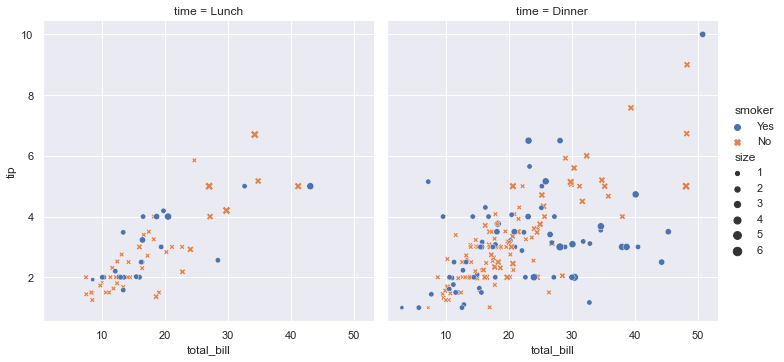

In [8]:
sns.relplot(data=tips,x="total_bill",y="tip",
            col="time",
            hue="smoker",
            style="smoker",
            size="size"
           )

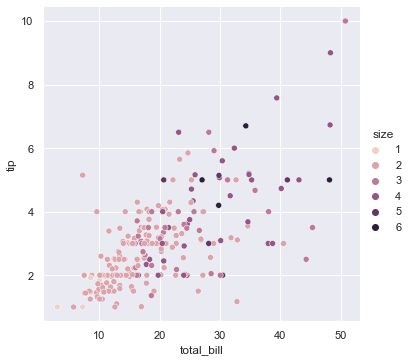

In [9]:
sns.relplot(data=tips,x="total_bill",y="tip",
            hue="size",
            
           )

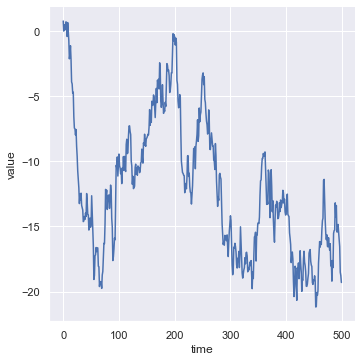

In [10]:
import pandas as pd
import numpy as np

df=pd.DataFrame(dict(time=np.arange(500),value=np.random.randn(500).cumsum()))

g=sns.relplot(data=df,kind='line',x="time",y="value")

In [11]:
fmri=sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


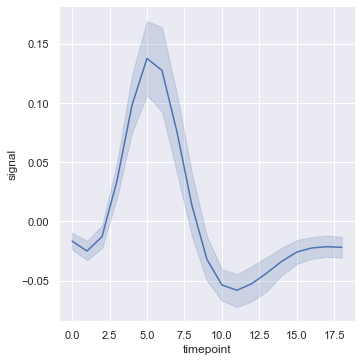

In [12]:
sns.relplot(x="timepoint",y="signal",kind="line",data=fmri)

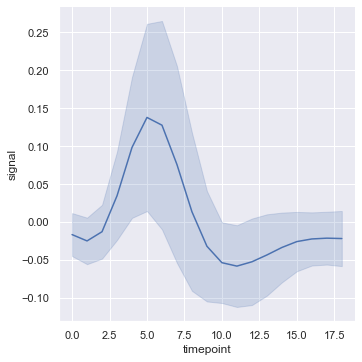

In [14]:
sns.relplot(x="timepoint",y="signal",ci="sd",kind="line",data=fmri)

## Data Structures accepted by seaborn

### long form and wide form data

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
stock=pd.read_excel("STOCK.xlsx")
stock.head()

,Close,Company,Date,High,Low,Number of Records,Open,Volume
0,398.08,Amazon,2019-12-27,405.63,396.25,1,404.65,1987280
1,402.92,Amazon,2019-12-23,405.00,399.20,1,403.69,2661823
2,402.20,Amazon,2019-12-20,404.72,395.78,1,396.84,5038537
3,404.39,Amazon,2019-12-26,404.52,396.81,1,401.79,1871590
4,399.20,Amazon,2019-12-24,403.72,396.37,1,402.52,1380373


<AxesSubplot:xlabel='Date', ylabel='Open'>

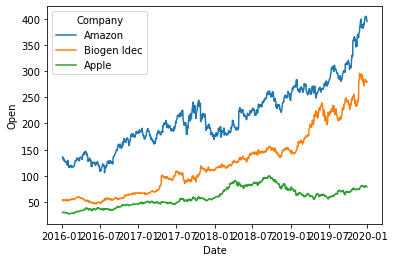

In [13]:
sns.lineplot(x='Date',y="Open",hue='Company',data=stock)

TypeError: plot got an unexpected keyword argument 'x'

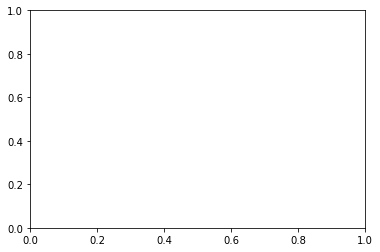

In [14]:
plt.plot(x='Date',y='Open',hue='Company',data='stock')

In [18]:
for group_index,group_frame in stock.groupby('Company'):
    print(group_index,group_frame)
    #plt.plot(group_frame['Date'],group_frame['Open'],label=group_index)

Amazon        Close Company       Date    High     Low  Number of Records    Open  \
0     398.08  Amazon 2019-12-27  405.63  396.25                  1  404.65   
1     402.92  Amazon 2019-12-23  405.00  399.20                  1  403.69   
2     402.20  Amazon 2019-12-20  404.72  395.78                  1  396.84   
3     404.39  Amazon 2019-12-26  404.52  396.81                  1  401.79   
4     399.20  Amazon 2019-12-24  403.72  396.37                  1  402.52   
...      ...     ...        ...     ...     ...                ...     ...   
1518  113.43  Amazon 2016-07-07  113.63  109.81                  1  109.84   
1525  109.26  Amazon 2016-06-30  112.68  108.11                  1  108.58   
1526  110.06  Amazon 2016-07-06  112.53  109.00                  1  110.65   
1537  110.96  Amazon 2016-07-01  111.69  106.70                  1  108.90   
1542  109.14  Amazon 2016-07-02  111.29  108.56                  1  110.92   

       Volume  
0     1987280  
1     2661823  
2     50

In [19]:
stock_wide=stock.pivot(index='Date',columns='Company',values='Open')
stock_wide.head()

Company,Amazon,Apple,Biogen Idec
Date,,,
2016-01-04,136.25,30.49,53.97
2016-01-05,133.43,30.66,54.72
2016-01-06,134.60,30.63,53.10
2016-01-07,132.01,30.25,53.23
2016-01-08,130.56,30.04,53.00


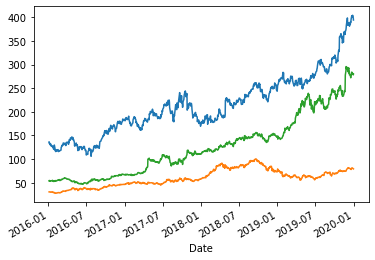

In [20]:
for col in stock_wide.columns:
    stock_wide[col].plot()

<Figure size 576x288 with 0 Axes>

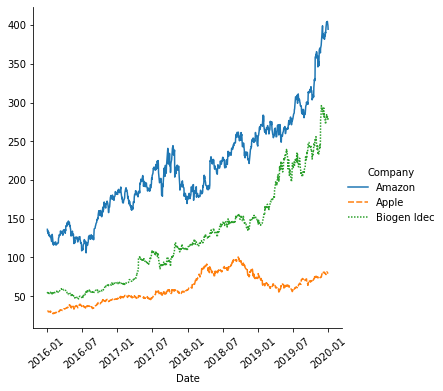

In [21]:
plt.figure(figsize=(8,4))
ax=sns.relplot(data=stock_wide,kind='line')
ax.set_xticklabels(rotation=40)

### sns.relplot(kind='line) => sns.lineplot()
### sns.relplot(kind='scatter')==sns.scatterplot()
###

## Distribution Plots

displot

histplot
kdeplot

In [22]:
penguins=sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

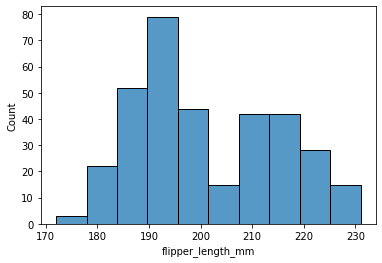

In [23]:
sns.histplot(data=penguins,x='flipper_length_mm')

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

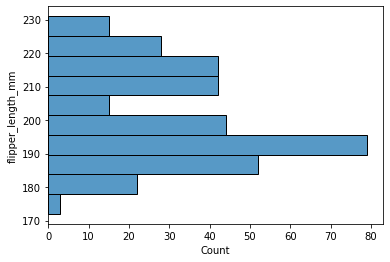

In [24]:
sns.histplot(data=penguins,y='flipper_length_mm')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

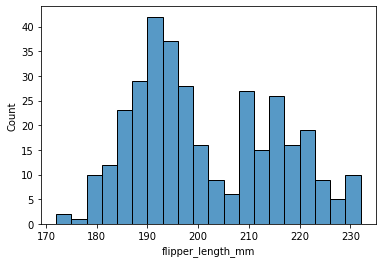

In [25]:
sns.histplot(data=penguins,x='flipper_length_mm',binwidth=3)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

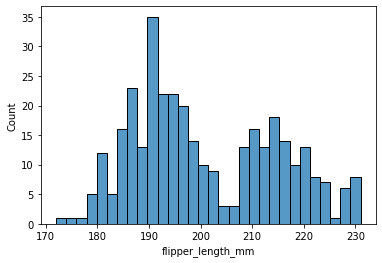

In [26]:
sns.histplot(data=penguins,x='flipper_length_mm',bins=30)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

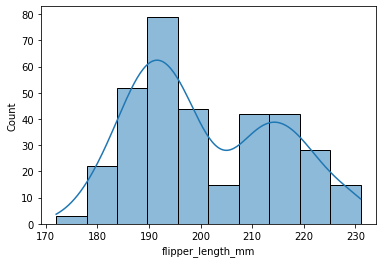

In [27]:
sns.histplot(data=penguins,x='flipper_length_mm',kde=True)

In [28]:
sns.__version__

'0.11.0'

<AxesSubplot:ylabel='Count'>

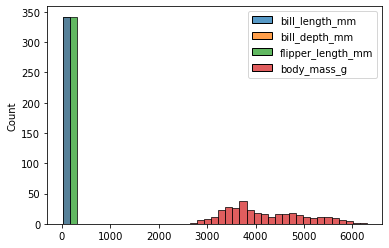

In [29]:
sns.histplot(data=penguins)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

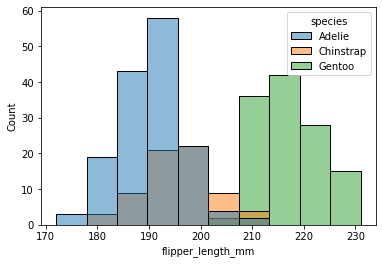

In [30]:
sns.histplot(data=penguins,x='flipper_length_mm',hue='species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

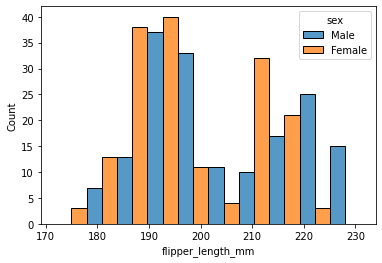

In [31]:
sns.histplot(data=penguins,x='flipper_length_mm',hue='sex',multiple='dodge')

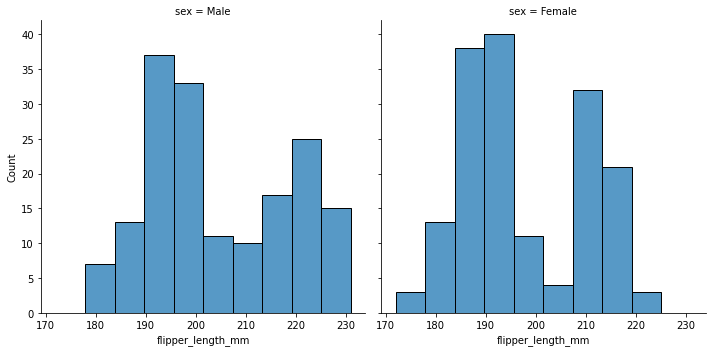

In [33]:
sns.displot(data=penguins,x='flipper_length_mm',col='sex',multiple='dodge')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

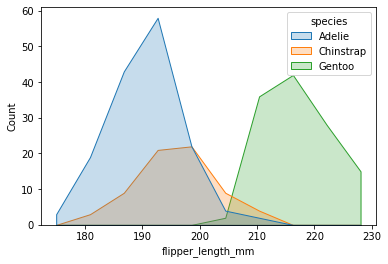

In [34]:
sns.histplot(data=penguins,x='flipper_length_mm',hue='species',element="poly")

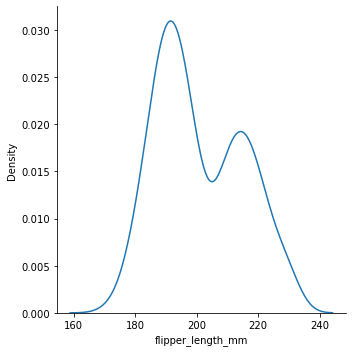

In [37]:
sns.displot(data=penguins,x='flipper_length_mm',kind='kde')

In [38]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


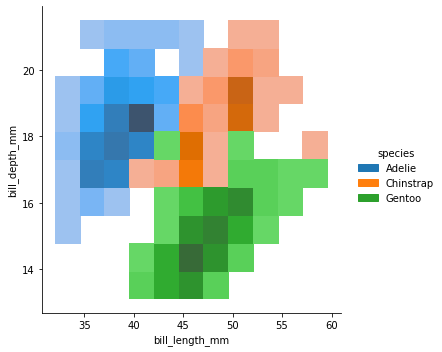

In [39]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm',hue='species')

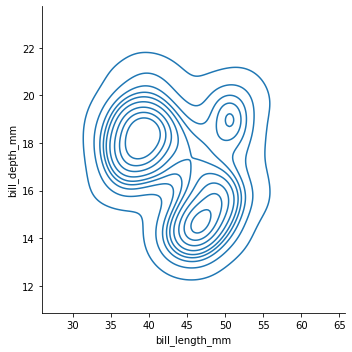

In [40]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm',kind='kde')

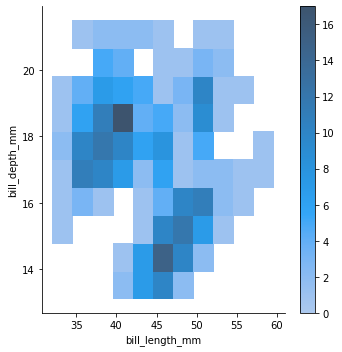

In [41]:
sns.displot(data=penguins,x='bill_length_mm',y='bill_depth_mm',cbar=True)

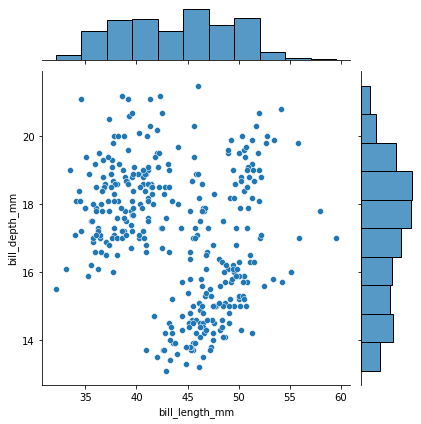

In [42]:
sns.jointplot(data=penguins,x='bill_length_mm',y='bill_depth_mm')

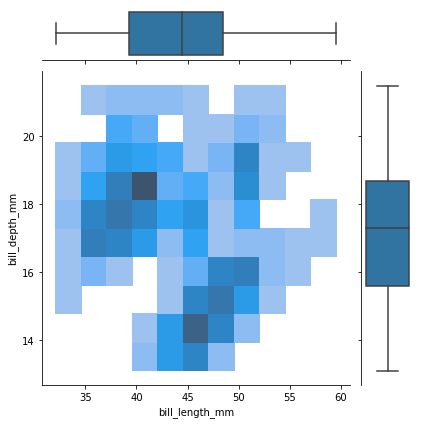

In [44]:
g=sns.JointGrid(data=penguins,x='bill_length_mm',y='bill_depth_mm')
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)


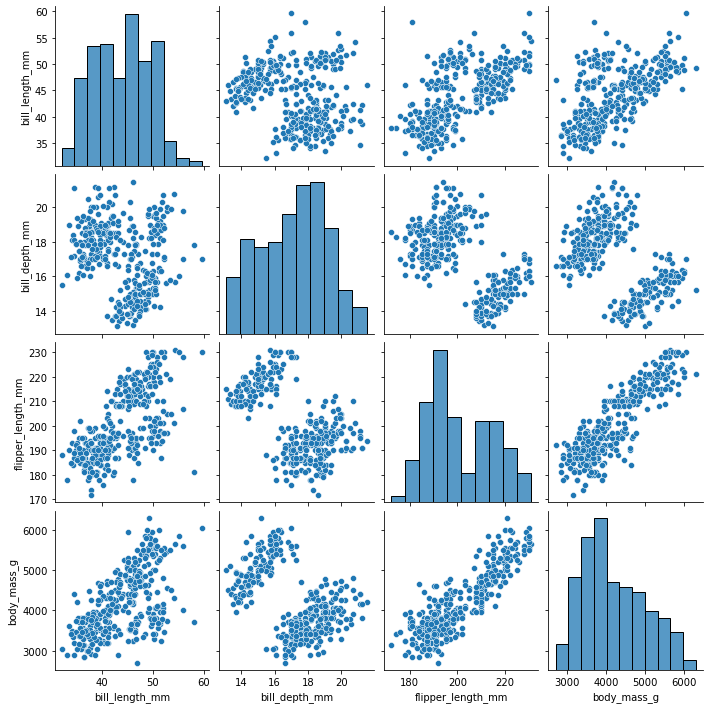

In [45]:
sns.pairplot(penguins)

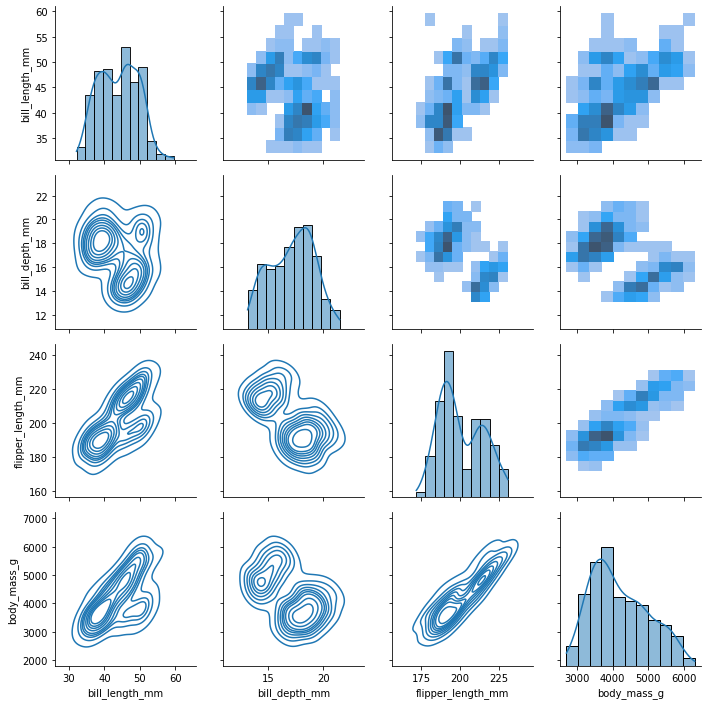

In [46]:
g=sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot,kde=True)

### Regression Plot

In [47]:
tips=sns.load_dataset("tips")

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

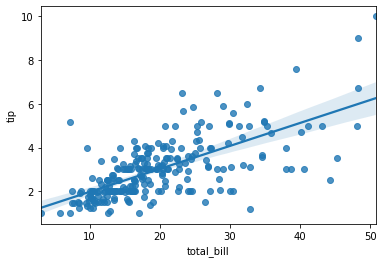

In [49]:
sns.regplot(x='total_bill',y='tip',data=tips)

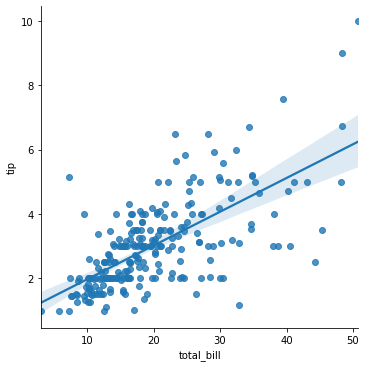

In [50]:
sns.lmplot(x='total_bill',y='tip',data=tips)

In [51]:
anscombe=sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


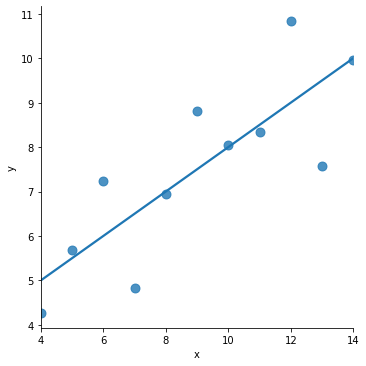

In [52]:
sns.lmplot(x="x",y="y",data=anscombe.query("dataset=='I'"),
          ci=None,
          scatter_kws={"s":80})

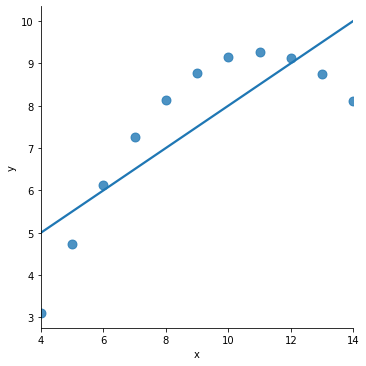

In [53]:
sns.lmplot(x="x",y="y",data=anscombe.query("dataset=='II'"),
          ci=None,
          scatter_kws={"s":80})

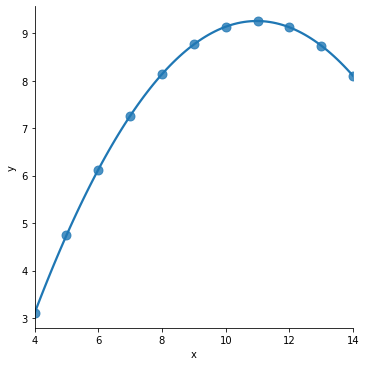

In [54]:
sns.lmplot(x="x",y="y",data=anscombe.query("dataset=='II'"),
          order=2,
          ci=None,
          scatter_kws={"s":80})

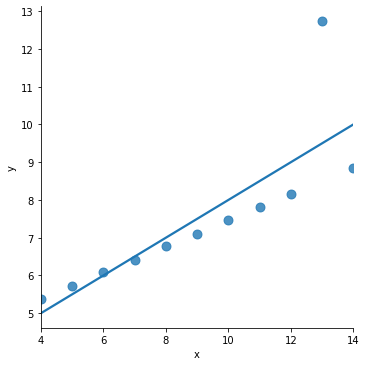

In [55]:
sns.lmplot(x="x",y="y",data=anscombe.query("dataset=='III'"),
          ci=None,
          scatter_kws={"s":80})

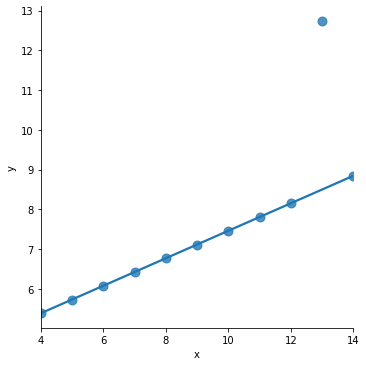

In [56]:
sns.lmplot(x="x",y="y",data=anscombe.query("dataset=='III'"),
          robust=True,
           ci=None,
          scatter_kws={"s":80})

<AxesSubplot:xlabel='x', ylabel='y'>

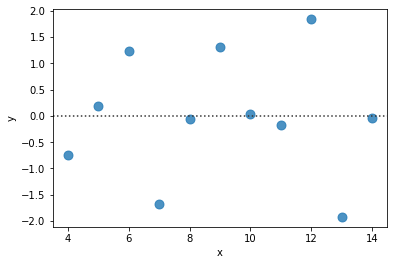

In [58]:
sns.residplot(x="x",y="y",data=anscombe.query("dataset=='I'"),
             scatter_kws={"s":80})

<AxesSubplot:xlabel='x', ylabel='y'>

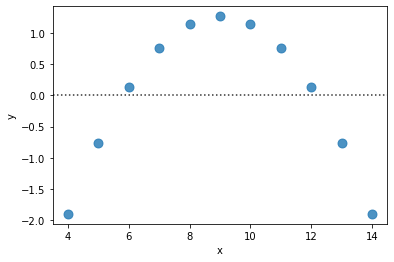

In [59]:
sns.residplot(x="x",y="y",data=anscombe.query("dataset=='II'"),
             scatter_kws={"s":80})

<AxesSubplot:xlabel='x', ylabel='y'>

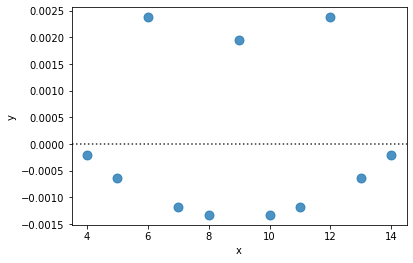

In [60]:
sns.residplot(x="x",y="y",data=anscombe.query("dataset=='II'"),
              order=2,
             scatter_kws={"s":80})

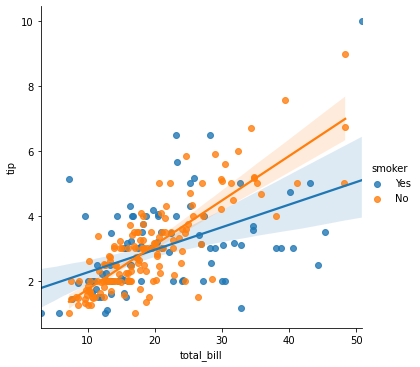

In [61]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=tips)

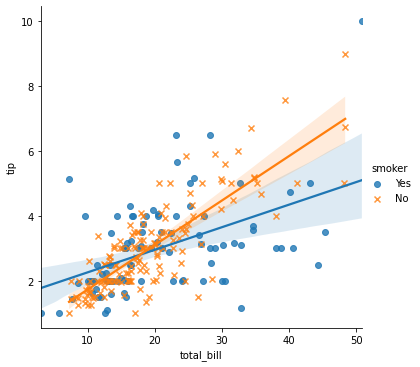

In [62]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=tips,
          markers=["o","x"])

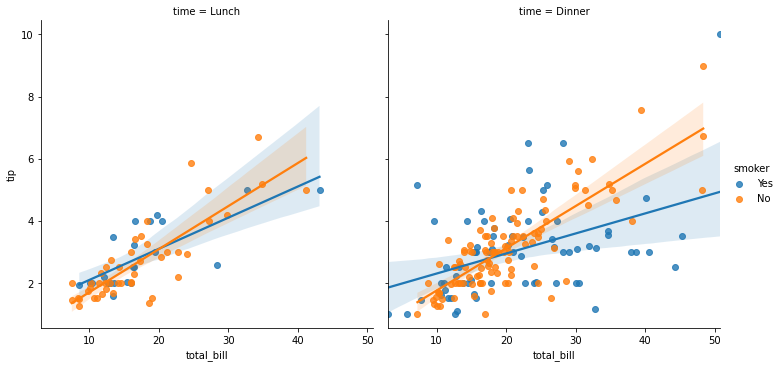

In [63]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col='time',data=tips,
          )

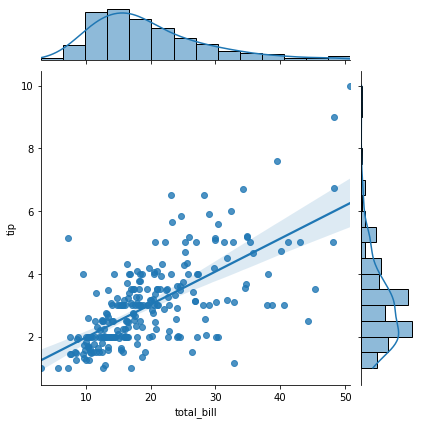

In [64]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### Categorical plots

In [65]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


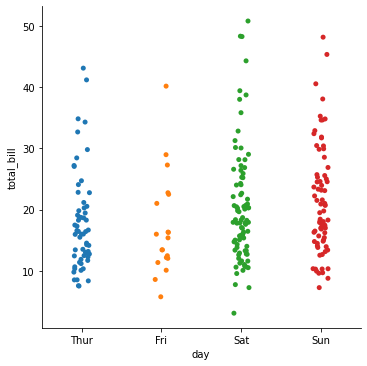

In [68]:
sns.catplot(x="day",y="total_bill",data=tips)

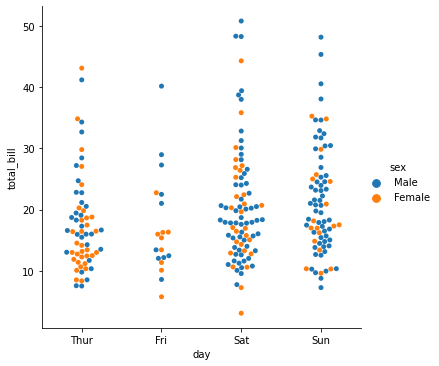

In [70]:
sns.catplot(x="day",y="total_bill",data=tips,kind="swarm",hue="sex")

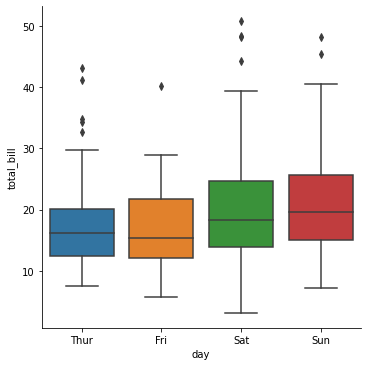

In [71]:
sns.catplot(x="day",y="total_bill",kind="box",data=tips)

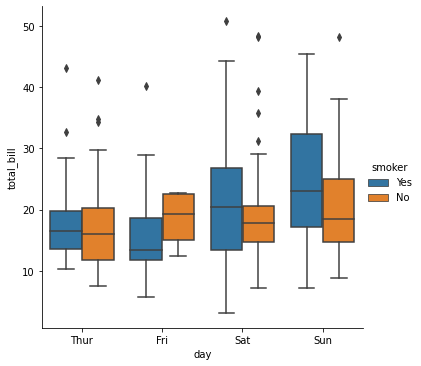

In [72]:
sns.catplot(x="day",y="total_bill",hue="smoker",kind="box",data=tips)